C:\Users\surya\AppData\Local\Temp\ipykernel_24528\1410609401.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


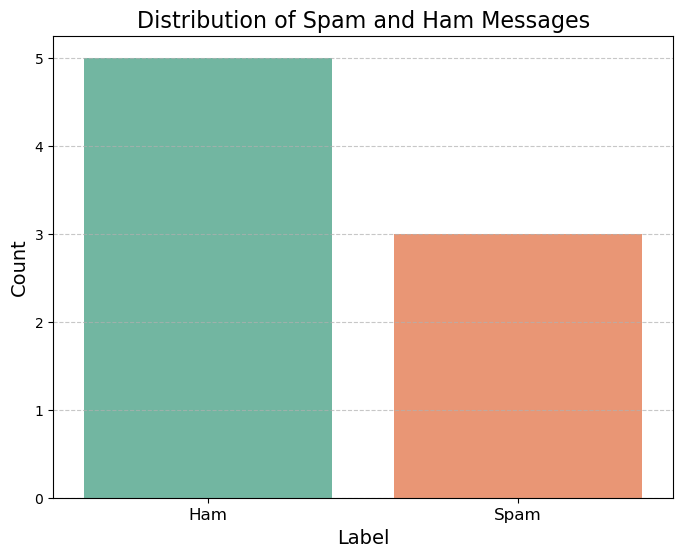

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5000
Confusion Matrix:
[[1 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



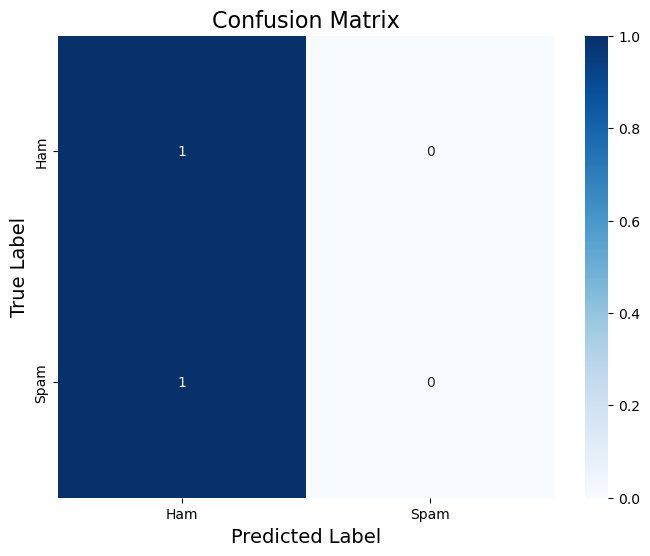

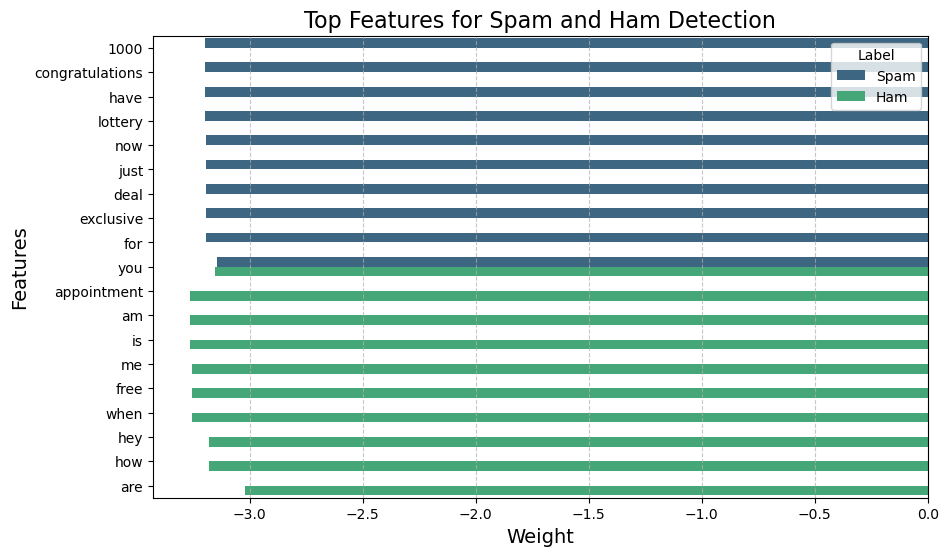

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample dataset creation (SMS Spam Collection)
data_dict = {
    'label': ['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam'],
    'message': [
        'Hey, how are you?',
        'Call me when you are free.',
        'WIN a free iPhone now!',
        'I am going to be late.',
        'Congratulations! You have won a lottery of $1000.',
        'Are we still on for dinner?',
        'Reminder: Your appointment is tomorrow.',
        'Exclusive deal just for you, call now!'
    ]
}

# Create a DataFrame from the sample data
data = pd.DataFrame(data_dict)

# Data Preprocessing
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Map labels to binary

# Visualize the distribution of spam and ham
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Spam and Ham Messages', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42, stratify=data['label'])

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Model Prediction
y_pred = model.predict(X_test_vectorized)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display Results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Feature Importance Visualization
feature_names = vectorizer.get_feature_names_out()
top_n = 10

# Get the top features
spam_probabilities = model.feature_log_prob_[1]
ham_probabilities = model.feature_log_prob_[0]
top_spam_features = np.argsort(spam_probabilities)[-top_n:]
top_ham_features = np.argsort(ham_probabilities)[-top_n:]

# Combine and sort features
top_features = feature_names[np.hstack([top_spam_features, top_ham_features])]
top_weights = np.hstack([spam_probabilities[top_spam_features], ham_probabilities[top_ham_features]])

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': top_features, 'Weight': top_weights})
features_df['Label'] = ['Spam'] * top_n + ['Ham'] * top_n

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Weight', y='Feature', hue='Label', dodge=True, palette='viridis')
plt.title('Top Features for Spam and Ham Detection', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.legend(title='Label')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()